# nmi | spring 2024
## homework 08 | ODEs
## your name here


### <b><font color=orange>q0. python demo: euler, heun demo w/ varying stepsize h</font></b>


* "$0$","$i$" in python code direct reference to $0,i$ wrt $v_0,v_i,w_0,w_i,y_0$ of lecture notes.

* the bulk of this code deals with formatting pandas dataframe to display step data and matplotlib plots.
</br></br>

lines relevant to specific problem:

```
line 17 F = lambda ... ~ IVP y' = f(t,y)
line 18 Y = lambda ... ~ true solution

line 20 ts = [a,b]     ~ IVP interval for t

line 26 t0 = ts[0]     ~ sets initial t for interval loop
line 27 ... y0 = Y(t0) ~ IVP initial condition

line 22 hs = [0.1,...  ~ range of stepsize h for problem
```

mess around if you like. you can always download the file again.
</br></br>

this is definitely code you can reuse, retool.
</br>


###### code


,"t,h=0.1","y,true",heun,"err,h",euler,"err,e"
0,0.0,1.000000,1.000000,0.000000,1.000000,0.000000
1,0.1,1.005038,1.005050,0.000012,1.000000,0.005038
2,0.2,1.020604,1.020677,0.000073,1.010100,0.010504
3,0.3,1.048084,1.048262,0.000179,1.031102,0.016982
4,0.4,1.089861,1.090185,0.000323,1.064735,0.025126
...,...,...,...,...,...,...
6,0.6,1.231652,1.232340,0.000688,1.181911,0.049741
7,0.7,1.342864,1.343736,0.000872,1.274425,0.068439
8,0.8,1.491383,1.492400,0.001017,1.397935,0.093448
9,0.9,1.687908,1.688981,0.001074,1.560970,0.126938


,"t,h=0.05","y,true",heun,"err,h",euler,"err,e"
0,0.00,1.000000,1.000000,0.000000e+00,1.000000,0.000000
1,0.05,1.001252,1.001253,7.802731e-07,1.000000,0.001252
2,0.10,1.005038,1.005042,4.660098e-06,1.002506,0.002531
3,0.15,1.011441,1.011452,1.158594e-05,1.007569,0.003872
4,0.20,1.020604,1.020625,2.147799e-05,1.015294,0.005310
...,...,...,...,...,...,...
16,0.80,1.491383,1.491657,2.737446e-04,1.442839,0.048545
17,0.85,1.582867,1.583153,2.863342e-04,1.526152,0.056714
18,0.90,1.687908,1.688199,2.912698e-04,1.621720,0.066188
19,0.95,1.808321,1.808607,2.858835e-04,1.731147,0.077174


,"t,h=0.025","y,true",heun,"err,h",euler,"err,e"
0,0.000,1.000000,1.000000,0.000000e+00,1.000000,0.000000
1,0.025,1.000313,1.000313,4.881287e-08,1.000000,0.000313
2,0.050,1.001252,1.001253,2.925413e-07,1.000625,0.000627
3,0.075,1.002824,1.002825,7.303581e-07,1.001879,0.000945
4,0.100,1.005038,1.005039,1.361059e-06,1.003768,0.001269
...,...,...,...,...,...,...
36,0.900,1.687908,1.687983,7.591472e-05,1.654088,0.033820
37,0.925,1.746070,1.746146,7.572247e-05,1.709530,0.036541
38,0.950,1.808321,1.808396,7.478290e-05,1.768849,0.039473
39,0.975,1.874925,1.874998,7.298631e-05,1.832293,0.042632


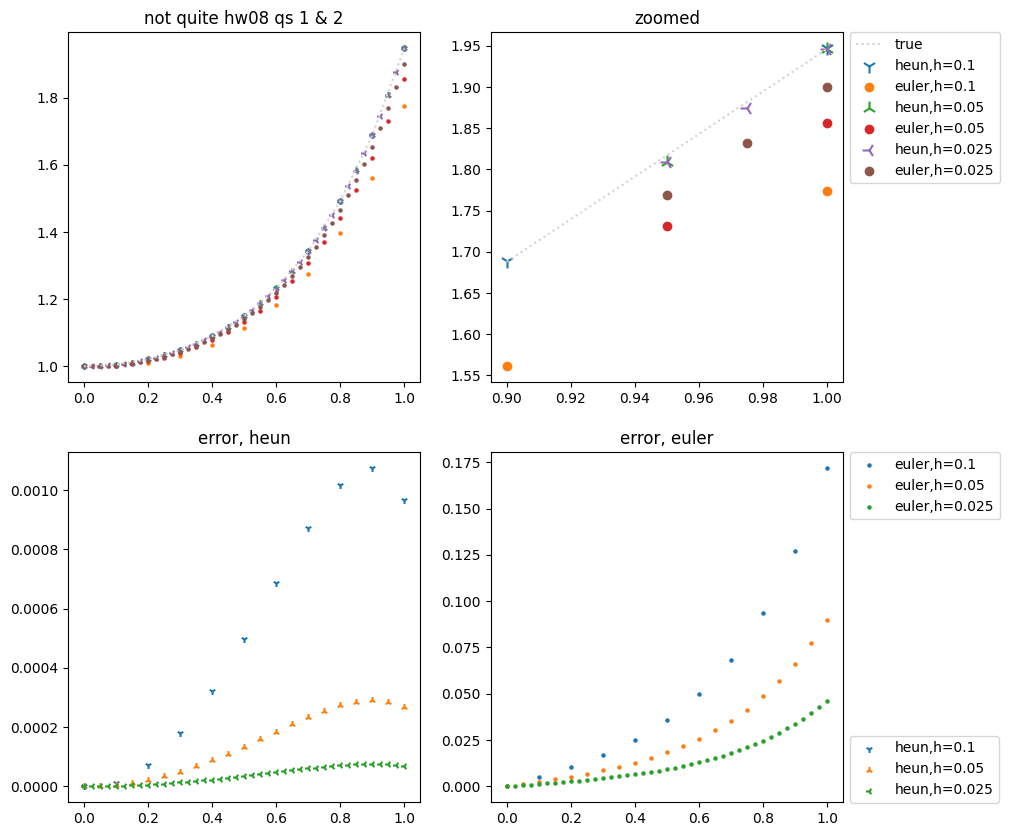

In [ ]:
# mod of nmi_14_0602 example 10
#
# 240327 ksa  CURRENTLY USING IVP FROM EXAMPLE 10
# 240327 ksa  added matplotlib during lecture
# 240327 ksa  fully looped h after lecture
# 240327 ksa  changed t to interval ts[]

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def main():

  pd.set_option('display.min_rows',0)
  pd.set_option('display.max_rows',10)

  F = lambda t,y: t*y + pow(t,3) # y' = f(t,y)
  Y = lambda t: 3.*np.exp(t*t/2.) - t*t -2. # true soln y, for error calc

  ts = [0,1] # interval

  hs = [0.1,0.05,0.025] # stepsize
  for ih,h in enumerate(hs):
    n = int((ts[1]-ts[0])/h) # n per h

    t0 = ts[0] # first t0 ~ "previous t"
    v0 = w0 = y0 = Y(t0) # ic, y0 handled by Y(t) bc actual solution provided

    data = np.zeros((n+1,2+2*2)) # t,y,(w,e),(v,e)
    data[0:] = [t0,y0,w0,abs(y0-w0),v0,abs(y0-v0)] # i = 0

    for i in range(1,n+1): # subsequent i
      ti = h*i # ti ~ "next t"

      # solver = heuns method / explicit trapezoid
      wi = w0 + (h/2)*(F(t0,w0) + F(t0+h,w0+h*F(t0,w0)))
      yi = Y(ti)

      # solver = eulers
      vi = v0 + h*F(t0,v0)

      # save step, reset for next step
      data[i:] = [ti,yi,wi,abs(yi-wi),vi,abs(yi-vi)]
      t0 = ti
      w0 = wi
      v0 = vi

    # print formatted data
    if True:
      nCol = [f"t,h={h}","y,true","heun","err,h","euler","err,e"] # columns
      df = pd.DataFrame(data=data,columns=nCol)
      print() # spacer
      display(df)

    # plot data
    if True:
      #
      # heun plots close to true so zoom/etc to make Δh more apparent = LOL
      #
      n_zm = int(n*.95) # zoom = after 95% of interval ts
      if ih == 0:
        fig,axs = plt.subplots(2,2,figsize=(10,10))
        axs[0,0].plot(data[:,0],data[:,1],label="true",c="lightgrey",linestyle=":") # true value
        axs[0,1].plot(data[n_zm:,0],data[n_zm:,1],label="true",c="lightgrey",linestyle=":") # true, zoom
      axs[0,0].scatter(data[:,0],data[:,2],label=f"heun,h={h}",marker=str(ih+1),s=25) # heun
      axs[0,0].scatter(data[:,0],data[:,4],label=f"euler,h={h}",marker="o",s=5) # euler
      axs[0,1].scatter(data[n_zm:,0],data[n_zm:,2],label=f"heun,h={h}",marker=str(ih+1),s=100) # heun, zoom
      axs[0,1].scatter(data[n_zm:,0],data[n_zm:,4],label=f"euler,h={h}",marker="o") # euler, zoom
      axs[1,0].scatter(data[:,0],abs(data[:,2]-data[:,1]),label=f"heun,h={h}",marker=str(ih+1),s=25) # heun
      axs[1,1].scatter(data[:,0],abs(data[:,4]-data[:,1]),label=f"euler,h={h}",marker="o",s=5) # euler

  if True: # plt.show() outside hs for-loop shows all data
    axs[0,0].set_title(f"not quite hw08 qs 1 & 2")
    axs[0,1].set_title(f"zoomed")
    if False: # meh
      axs[0,1].set_xlim(0.94,1)
      axs[0,1].set_ylim(1.7,1.9)
    axs[0,1].legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
    axs[1,0].set_title(f"error, heun")
    axs[1,0].legend(bbox_to_anchor=(2.22,0.19),loc='upper left',borderaxespad=0)
    axs[1,1].set_title(f"error, euler")
    axs[1,1].legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
    print() # spacer
    plt.show()

if __name__ == "__main__":
  main()


### q1. (15 pts) eulers method


given initial value problem
</br></br>

$$
\left\{
  \begin{array}
    && y' = t^2y \\
    & y(0) = 1 \\
    & t\in [0,1].
  \end{array}
\right.
$$
</br>

note: solution is $y(t) = e^{t^3/3}$.
</br>


#### a) (10 pts) on a single graph, plot solution, eulers method approximation and error using stepsize $h = 0.1, 0.05, 0.025$;
</br>


###### code


,"t,h=0.1","y,true",heun,"err,h",euler,"err,e"
0,0.0,1.000000,1.000000,0.000000,1.000000,0.000000
1,0.1,1.000333,1.000500,0.000167,1.000000,0.000333
2,0.2,1.002670,1.003003,0.000333,1.001000,0.001670
3,0.3,1.009041,1.009541,0.000500,1.005004,0.004037
4,0.4,1.021563,1.022233,0.000670,1.014049,0.007513
...,...,...,...,...,...,...
6,0.6,1.074655,1.075686,0.001031,1.056031,0.018625
7,0.7,1.121126,1.122351,0.001226,1.094048,0.027078
8,0.8,1.186095,1.187524,0.001429,1.147656,0.038439
9,0.9,1.275069,1.276698,0.001629,1.221106,0.053963


,"t,h=0.05","y,true",heun,"err,h",euler,"err,e"
0,0.00,1.000000,1.000000,0.000000,1.000000,0.000000
1,0.05,1.000042,1.000063,0.000021,1.000000,0.000042
2,0.10,1.000333,1.000375,0.000042,1.000125,0.000208
3,0.15,1.001126,1.001188,0.000063,1.000625,0.000501
4,0.20,1.002670,1.002754,0.000083,1.001751,0.000919
...,...,...,...,...,...,...
16,0.80,1.186095,1.186464,0.000369,1.166055,0.020040
17,0.85,1.227167,1.227564,0.000396,1.203369,0.023798
18,0.90,1.275069,1.275493,0.000424,1.246841,0.028228
19,0.95,1.330815,1.331265,0.000450,1.297338,0.033477


,"t,h=0.025","y,true",heun,"err,h",euler,"err,e"
0,0.000,1.000000,1.000000,0.000000,1.000000,0.000000
1,0.025,1.000005,1.000008,0.000003,1.000000,0.000005
2,0.050,1.000042,1.000047,0.000005,1.000016,0.000026
3,0.075,1.000141,1.000148,0.000008,1.000078,0.000063
4,0.100,1.000333,1.000344,0.000010,1.000219,0.000115
...,...,...,...,...,...,...
36,0.900,1.275069,1.275177,0.000108,1.260623,0.014446
37,0.925,1.301891,1.302003,0.000112,1.286150,0.015740
38,0.950,1.330815,1.330930,0.000115,1.313662,0.017153
39,0.975,1.361999,1.362117,0.000118,1.343301,0.018697


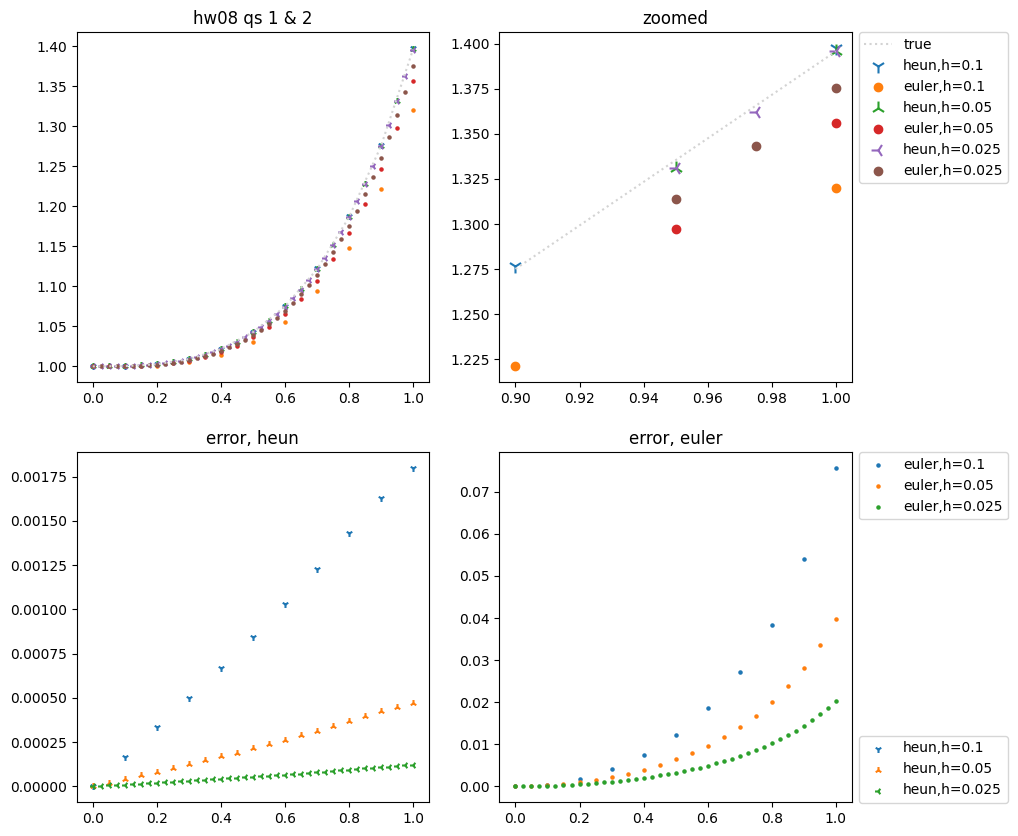

In [1]:
# mod of demo above
#
# 240327 ksa  CURRENTLY USING IVP FROM EXAMPLE 10
# 240327 ksa  added matplotlib during lecture
# 240327 ksa  fully looped h after lecture
# 240327 ksa  changed t to interval ts[]

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def main():

  pd.set_option('display.min_rows',0)
  pd.set_option('display.max_rows',10)

  F = lambda t,y: pow(t,2)*y # y' = f(t,y)
  Y = lambda t: np.exp(pow(t,3)/3.) # true soln y, for error calc

  ts = [0,1] # interval

  hs = [0.1,0.05,0.025] # stepsize
  for ih,h in enumerate(hs):
    n = int((ts[1]-ts[0])/h) # n per h

    t0 = ts[0] # first t0 ~ "previous t"
    v0 = w0 = y0 = Y(t0) # ic, y0 handled by Y(t) bc actual solution provided

    data = np.zeros((n+1,2+2*2)) # t,y,(w,e),(v,e)
    data[0:] = [t0,y0,w0,abs(y0-w0),v0,abs(y0-v0)] # i = 0

    for i in range(1,n+1): # subsequent i
      ti = h*i # ti ~ "next t"

      # solver = heuns method / explicit trapezoid
      wi = w0 + (h/2)*(F(t0,w0) + F(t0+h,w0+h*F(t0,w0)))
      yi = Y(ti)

      # solver = eulers
      vi = v0 + h*F(t0,v0)

      # save step, reset for next step
      data[i:] = [ti,yi,wi,abs(yi-wi),vi,abs(yi-vi)]
      t0 = ti
      w0 = wi
      v0 = vi

    # print formatted data
    if True:
      nCol = [f"t,h={h}","y,true","heun","err,h","euler","err,e"] # columns
      df = pd.DataFrame(data=data,columns=nCol)
      print() # spacer
      display(df)

    # plot data
    if True:
      #
      # heun plots close to true so zoom/etc to make Δh more apparent = LOL
      #
      n_zm = int(n*.95) # zoom = after 95% of interval ts
      if ih == 0:
        fig,axs = plt.subplots(2,2,figsize=(10,10))
        axs[0,0].plot(data[:,0],data[:,1],label="true",c="lightgrey",linestyle=":") # true value
        axs[0,1].plot(data[n_zm:,0],data[n_zm:,1],label="true",c="lightgrey",linestyle=":") # true, zoom
      axs[0,0].scatter(data[:,0],data[:,2],label=f"heun,h={h}",marker=str(ih+1),s=25) # heun
      axs[0,0].scatter(data[:,0],data[:,4],label=f"euler,h={h}",marker="o",s=5) # euler
      axs[0,1].scatter(data[n_zm:,0],data[n_zm:,2],label=f"heun,h={h}",marker=str(ih+1),s=100) # heun, zoom
      axs[0,1].scatter(data[n_zm:,0],data[n_zm:,4],label=f"euler,h={h}",marker="o") # euler, zoom
      axs[1,0].scatter(data[:,0],abs(data[:,2]-data[:,1]),label=f"heun,h={h}",marker=str(ih+1),s=25) # heun
      axs[1,1].scatter(data[:,0],abs(data[:,4]-data[:,1]),label=f"euler,h={h}",marker="o",s=5) # euler

  if True: # plt.show() outside hs for-loop shows all data
    axs[0,0].set_title(f"hw08 qs 1 & 2")
    axs[0,1].set_title(f"zoomed")
    if False: # meh
      axs[0,1].set_xlim(0.94,1)
      axs[0,1].set_ylim(1.7,1.9)
    axs[0,1].legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
    axs[1,0].set_title(f"error, heun")
    axs[1,0].legend(bbox_to_anchor=(2.22,0.19),loc='upper left',borderaxespad=0)
    axs[1,1].set_title(f"error, euler")
    axs[1,1].legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
    print() # spacer
    plt.show()

if __name__ == "__main__":
  main()


#### b) (5 pts) comment on the effects of halving stepsize.
</br>

### q2. (15 pts) explicit trapezoid method


use IVP from q1.
</br>


#### a) (10 pts) on a single graph, plot solution, explicit trapezoid approximation and error using using stepsize $h = 0.1, 0.05, 0.025$;
</br>


#### b) (5 pts) comment on error between q1 and q2.
</br>


### q3. (15 pts) systems of equations


convert higher-order ODEs to first-order system of equations.
</br>


##### answer


a) $y_1 = y, y_2 = y'; y_1' = y_2, y_2' = ty_1$.</br>
b) $y_1 = y, y_2 = y'; y_1' = y_2, y_2' = 2ty_2 - 2y_1$.</br>
c) $y_1 = y, y_2 = y'; y_1' = y_2, y_2' = y_1 + ty_2$.

#### a) $y'' - ty = 0$ (airy's equation);


#### b) $y'' - 2ty' + 2y = 0$ (hermites equation);


#### c) $y'' - ty' - y = 0$ (some other equation).


### q4. (15 pts <b><font color=blue>MATH 685 ONLY</font></b>) runge-kutta


derive RK4.
</br>
